Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 06: Wavelet Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, January 6, 2025**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is intended to revise the notions of eigenvectors and eigenvalues, which will pop up in class soon.  Check if you are comfortable with them. You don't need a deep understanding, but you should have got the basic ideas.  If you have problems to answer these questions offhand, this is a good time to look terms up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Filter design and frequency space (5 points)

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the kernel size. What do you observe?

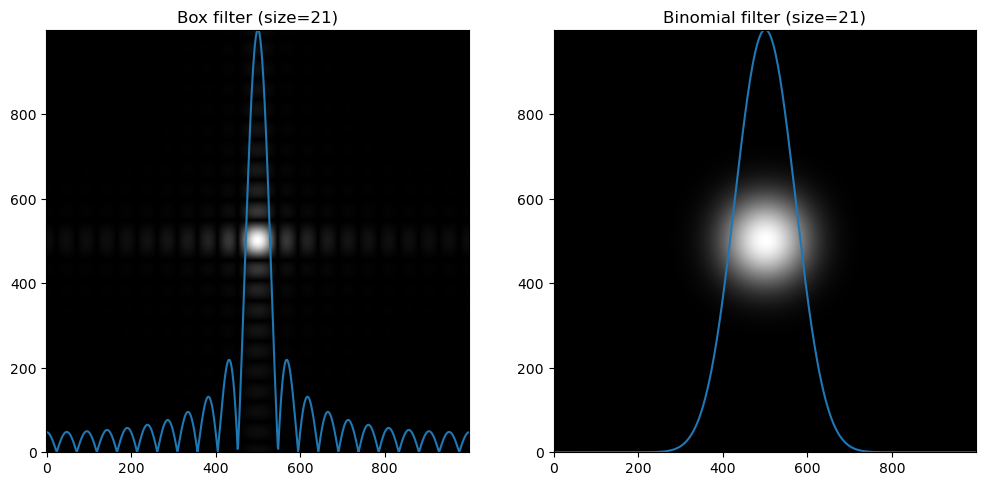

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 20 # vary this
image_size = 1000
if kernel_size % 2 == 0:
            kernel_size += 1  
        
# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

box_size = kernel_size // 2
box_kernel[image_size // 2 - box_size:image_size // 2 + box_size + 1, 
           image_size // 2 - box_size:image_size // 2 + box_size + 1] = 1 / (kernel_size * kernel_size)

binomial_coeffs = [binom(kernel_size - 1, i) for i in range(kernel_size)]
binomial_1d = np.array(binomial_coeffs) / sum(binomial_coeffs)  # Normalize
binomial_kernel_1d = np.zeros(image_size)
binomial_kernel_1d[image_size // 2 - box_size:image_size // 2 + box_size + 1] = binomial_1d
binomial_kernel = np.outer(binomial_kernel_1d, binomial_kernel_1d)

box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

YOUR ANSWER HERE

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_{\max}$. What do you observe? Explain that observation and discuss how to improve the result.

Hint: The low pass filter is shown in CV-06 slides 45. 

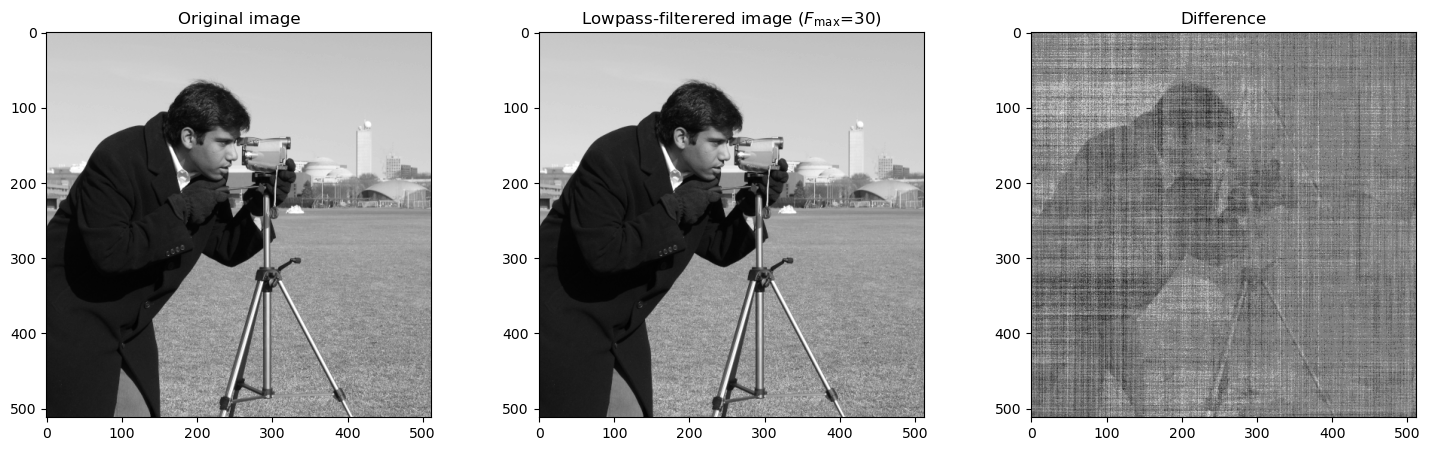

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

f_max = 30
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    # Fourier Transform of the image
    fft_image = np.fft.fft2(image)
    fft_image_shifted = np.fft.fftshift(fft_image)

    # Get the dimensions of the image
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2

    # Compute the radius in frequency space
    radius = int(f_max * min(rows, cols) / 2)

    # Modify the Fourier coefficients directly
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            if distance > radius:
                fft_image_shifted[i, j] = 0  # Suppress high-frequency components

    # Inverse Fourier Transform to reconstruct the image
    filtered_fft = np.fft.ifftshift(fft_image_shifted)
    result = np.fft.ifft2(filtered_fft).real

    return result
   

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

YOUR ANSWER HERE

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

YOUR ANSWER HERE

## Assignment 2: Discrete Cosine Transform (5 points)

**a)** Read up about the DCT and IDCT functions and check out the scipy implementation.

In [16]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct

Text(0.5, 1.0, 'Restored Image')

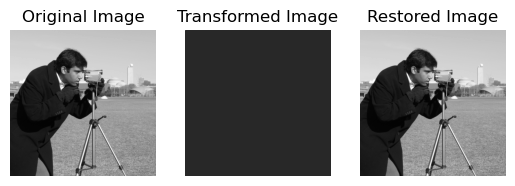

In [17]:
def dct_2d_sp(array, type_=2):
    return dct(dct(array, axis=0, type=type_), axis=1, type=type_)

def idct_2d_sp(array, type_=2):
    return idct(idct(array, axis=0, type=type_), axis=1, type=type_)


img = iio.imread("imageio:camera.png")
img_transformed = dct_2d_sp(img)
img_orig = idct_2d_sp(img_transformed)

plt.subplot(131); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(132); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')
plt.subplot(133); plt.imshow(img_orig); plt.axis('off'); plt.title('Restored Image')

**b)** Implement the DCT-II function given by the formula: $C_k = 2 \sum_{n=0}^{N-1} f_n \cos\left(\frac{\pi k(2n+1)}{2N} \right)$

False


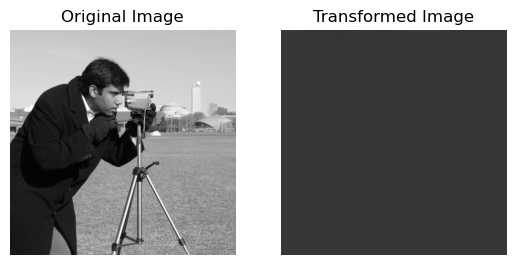

In [25]:
def my_dct2_1d(f, axis=0):
    C = np.zeros_like(f, dtype=np.float64)
    f = np.moveaxis(f, axis, 0)
    N = f.shape[0]

    # Compute DCT-II using the given formula
    for k in range(N):
        C[k] = 2 * np.sum(f * np.cos((np.pi * k * (2 * np.arange(N) + 1)) / (2 * N)), axis=0)
        
     # Normalize coefficients
    C[0] *= np.sqrt(1 / N)
    C[1:] *= np.sqrt(2 / N)

    # Move the axis back to its original position
    return np.moveaxis(C, 0, axis)


def my_dct2_2d(f):
    return my_dct2_1d(my_dct2_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct2_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type_=2).round()).all())

**c)** Implement the DCT-III function given by the formula: $C_k = f_0 + 2 \sum_{n=1}^{N-1} f_n \cos\left(\frac{\pi(2k+1)n}{2N}\right)$

False


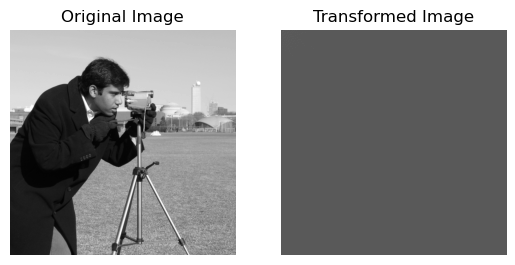

In [27]:
def my_dct3_1d(f, axis=0):
     # Move the specified axis to the front
    f = np.moveaxis(f, axis, 0)
    N = f.shape[0]
    shape_rest = f.shape[1:]
    C = np.zeros_like(f, dtype=np.float64)

    # Prepare indices for computation
    n_indices = np.arange(1, N).reshape(-1, 1)  # Shape (N-1, 1)
    k_indices = np.arange(N).reshape(1, -1)     # Shape (1, N)

    # Compute DCT-III using vectorized operations
    for k in range(N):
        cosine_term = np.cos((np.pi * (2 * k + 1) * n_indices) / (2 * N))
        C[k] = f[0] + 2 * np.sum(f[1:] * cosine_term, axis=0)

    # Normalize coefficients
    C *= np.sqrt(1 / N)

    # Move the axis back to its original position
    return np.moveaxis(C, 0, axis)


def my_dct3_2d(f):
    return my_dct3_1d(my_dct3_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct3_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type_=3).round()).all())

**d)** What relationship between the DCT-II, DCT-III, IDCT-II and IDCT-III can be observed? Demonstrate your findings. (If you did not solve exercises b and c, you may use provided `dct_2d_sp` function).

True


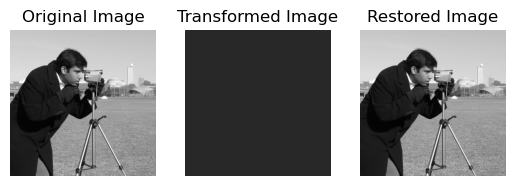

In [32]:
normalize = lambda x: x.astype(np.float64)/np.max(x)

img = iio.imread("imageio:camera.png")
img = normalize(img)

img_transformed = dct_2d_sp(img)
img_orig = idct_2d_sp(img_transformed)
img_orig = normalize(img_orig)

plt.subplot(131); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(132); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')
plt.subplot(133); plt.imshow(img_orig); plt.axis('off'); plt.title('Restored Image')

print((img.round() == img_orig.round()).all())

## Assignment 3: Wavelet Transform (5 points)

**a)** Write a function that transforms a mother wavelet into a wavelet function.

In [33]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def wavelet(mother_wavelet, s=0, d=0):
    func = lambda x: (1 / np.sqrt(abs(s))) * mother_wavelet((x - d) / s)
    return func


**b)** Write a function for the Gabor mother wavelet.

In [34]:
def gabor_mother_wavelet(x, sigma=1, k=1):
     # Gaussian envelope
    gaussian = np.exp(-x**2 / (2 * sigma**2))
    
    # Oscillatory component
    oscillatory = np.exp(1j * k * x)
    
    # Combine both components
    ret = gaussian * oscillatory
    
    return ret

**c)** Plot the real and imaginary part of the gabor wavelet. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

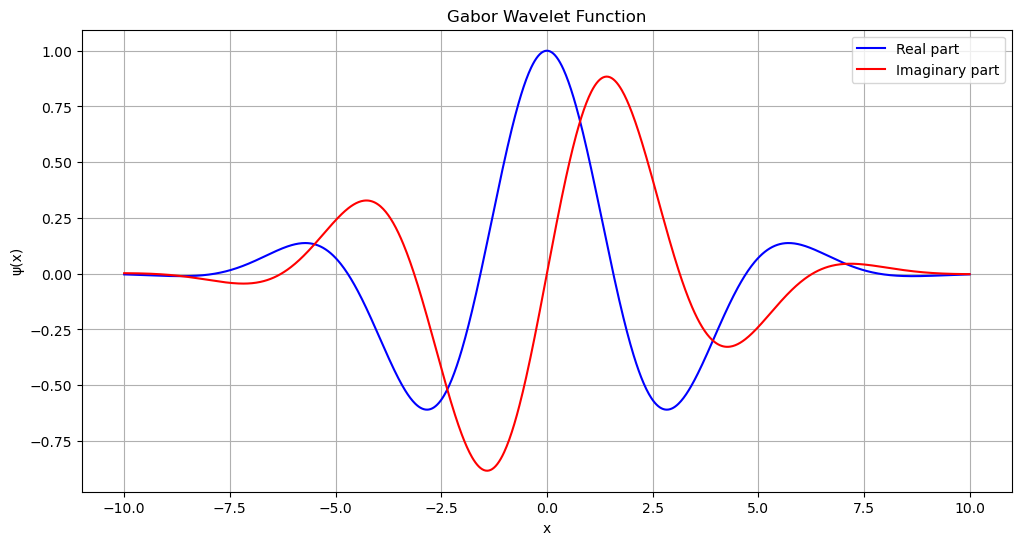

In [36]:
# Generate x values over the interval [-10, 10]
x_vals = np.linspace(-10, 10, 1000)

sigma = 3
k = 1  
gabor_vals = gabor_mother_wavelet(x_vals, sigma=sigma, k=k)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, np.real(gabor_vals), label="Real part", color="blue")
plt.plot(x_vals, np.imag(gabor_vals), label="Imaginary part", color="red")

# Add labels, legend, and title
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.title("Gabor Wavelet Function")
plt.legend()
plt.grid()
plt.show()

**d)** Plot the real and imaginary part of the gabor wavelet in 3d. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

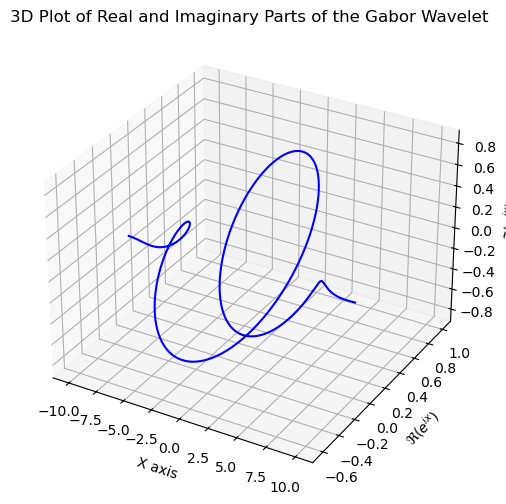

In [37]:
# Generate x values over the interval [-10, 10]
x_vals = np.linspace(-10, 10, 1000)

# Compute the Gabor wavelet for sigma = 3
sigma = 3
k = 1  # You can adjust this for different frequencies
gabor_vals = gabor_mother_wavelet(x_vals, sigma=sigma, k=k)

# Extract real and imaginary parts
real_vals = np.real(gabor_vals)
imag_vals = np.imag(gabor_vals)

# 3D Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot the real and imaginary parts as a 3D curve
ax.plot(x_vals, real_vals, imag_vals, label="Gabor Wavelet", color="b")

# Labels and title
ax.set_xlabel("X axis")
ax.set_ylabel("$\Re(e^{ix})$")
ax.set_zlabel("$\Im(e^{ix})$")
ax.set_title("3D Plot of Real and Imaginary Parts of the Gabor Wavelet")

# Show the plot
plt.show()

**e)** Implement the Haar Basis Wavelet and the Haar Scale Wavelet.

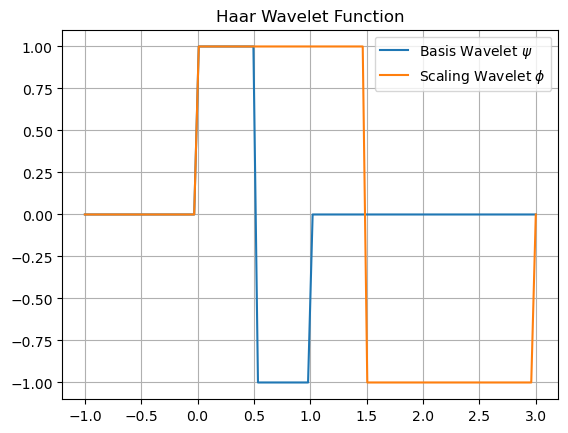

In [51]:
def haar_basis_wavelet(x):
    ret = np.zeros_like(x)
    for i in range(len(x)):
        if 0 <= x[i] < 0.5:
            ret[i] = 1
        elif 0.5 <= x[i] < 1:
            ret[i] = -1
    return ret


def haar_scale_wavelet(x,s=3, d=0):
    ret = np.zeros_like(x)
    for i in range(len(x)):
        if d <= x[i] < d + s / 2:
            ret[i] = 1
        elif d + s / 2 <= x[i] < d + s:
            ret[i] = -1
    return ret

x = np.linspace(-1, 3, 100)
plt.grid()
plt.plot(x, haar_basis_wavelet(x), label="Basis Wavelet $\psi$")
plt.plot(x, haar_scale_wavelet(x), label="Scaling Wavelet $\phi$")
plt.legend()
plt.title("Haar Wavelet Function")
plt.show()